In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import geopandas as gpd
import scipy
import numpy as np 
import swifter
import re 
from collections import Counter 

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression


%matplotlib inline

In [74]:
condos = pd.read_csv('condos.csv')
comparablerentals = pd.read_csv('comparablerentals.csv')

comparablerentals.head().T

In [75]:
y_train = comparablerentals['Gross Income per SqFt']
comparablerentals.drop(columns=['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',\
                               'Borough', 'Estimated', 'Condo Reference', 'Gross Income per SqFt'], inplace=True)

In [76]:
comparablerentals.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Distance from Co-op in miles,Report Year,Borough PCA 1,Borough PCA 2,Borough PCA 3
0,66.0,1930.0,52969.0,1834816.0,462069.0,8.72,1372747.0,10364000.0,195.66,0.35,2012,-0.534149,-0.019101,-0.034965
1,68.0,1900.0,58354.0,2087396.0,742339.0,12.72,1345057.0,10155000.0,174.02,0.37,2012,-0.534149,-0.019101,-0.034965
2,20.0,1900.0,31118.0,771607.0,187390.0,6.02,584217.0,4385000.0,140.92,0.37,2012,-0.534149,-0.019101,-0.034965
3,209.0,1998.0,239165.0,6580344.0,1602924.0,6.70,4977420.0,37580000.0,157.13,0.56,2012,-0.534149,-0.019101,-0.034965
4,210.0,1998.0,230766.0,6196187.0,1722965.0,7.47,4473222.0,33740000.0,146.21,0.56,2012,-0.534149,-0.019101,-0.034965


In [77]:
y_test = condos['Gross Income per SqFt']
condos.drop(columns=['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',\
                               'Borough', 'Estimated', 'Condo Reference', 'Gross Income per SqFt'], inplace=True)

In [78]:
condos.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Expense per SqFt,Net Operating Income,Full Market Value,Market Value per SqFt,Report Year,Distance from Co-op in miles,Borough PCA 1,Borough PCA 2,Borough PCA 3
0,21,1909,51387,1780046,448095,8.72,1331951,10056000,195.69,2012,0.0,-0.534149,-0.019101,-0.034965
1,211,1926,239121,6578219,1602111,6.70,4976108,37570000,157.12,2012,0.0,-0.534149,-0.019101,-0.034965
2,92,1911,167448,5398524,1461821,8.73,3936703,29722000,177.50,2012,0.0,-0.534149,-0.019101,-0.034965
3,83,1927,168176,5600261,1992886,11.85,3607375,27236000,161.95,2012,0.0,-0.534149,-0.019101,-0.034965
4,1664,1971,2075590,37256841,14238547,6.86,23018294,162215000,78.15,2012,0.0,-0.534149,-0.019101,-0.034965


In [79]:
from sklearn.preprocessing import StandardScaler

In [18]:
SS = StandardScaler()

In [84]:
condos[['Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income', 'Full Market Value', \
       'Market Value per SqFt', 'Report Year', 'Distance from Co-op in miles', 'Borough PCA 1', \
       'Borough PCA 2', 'Borough PCA 3']] = \
SS.fit_transform(condos[['Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income', 'Full Market Value', \
       'Market Value per SqFt', 'Report Year', 'Distance from Co-op in miles', 'Borough PCA 1', \
       'Borough PCA 2', 'Borough PCA 3']])

In [85]:
comparablerentals[['Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income', 'Full Market Value', \
       'Market Value per SqFt', 'Report Year', 'Distance from Co-op in miles', 'Borough PCA 1', \
       'Borough PCA 2', 'Borough PCA 3']] = SS.fit_transform(comparablerentals[['Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income', 'Estimated Expense', 'Expense per SqFt', 'Net Operating Income', 'Full Market Value', \
       'Market Value per SqFt', 'Report Year', 'Distance from Co-op in miles', 'Borough PCA 1', \
       'Borough PCA 2', 'Borough PCA 3']])

In [86]:
x = comparablerentals

In [87]:
from sklearn import linear_model

In [88]:
lm = linear_model.LinearRegression()

In [89]:
x = x.fillna(0)

In [90]:
y_train = np.array(y_train)

In [91]:
y_train = y_train.reshape(-1, 1)

In [92]:
lm.fit(x,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
print(lm.coef_)
print(lm.intercept_)

[[  0.22581518  -0.10358413  -4.75650651  37.43709659  -9.39294153
    0.23230473 -15.73734557  -8.15612531   8.67030414   0.17203622
    0.55245434  -2.42420318  -0.15807963  -0.49277853]]
[25.94967898]


In [94]:
y_test = np.array(y_test)

In [95]:
y_test = y_test.reshape(-1, 1)

In [96]:
x_test = condos

In [97]:
x_test = x_test.fillna(0)

In [98]:
y_hat = lm.predict(x_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
print(x_test.shape)
print(y_test.shape)

(31348, 14)
(31348, 1)


In [101]:
lm.score(x, y_train)

0.8652170437872165

In [102]:
lm.score(x_test, y_test)

0.9365312832262317

In [103]:
sum(np.square(y_hat - y_test))

array([292800.42392188])

In [104]:
results = pd.DataFrame(y_hat)

In [105]:
residuals = y_hat - y_test

In [106]:
residuals = pd.DataFrame(residuals)

In [107]:
results2 = pd.concat([results, residuals])

In [108]:
K_Meangrouping = KMeans(n_clusters= 5)
K_Meangrouping.fit(x)

In [109]:
K_Meangrouping.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
from sklearn.metrics import silhouette_score

In [48]:
inertias = []
for n_clusters in range(2,30, 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

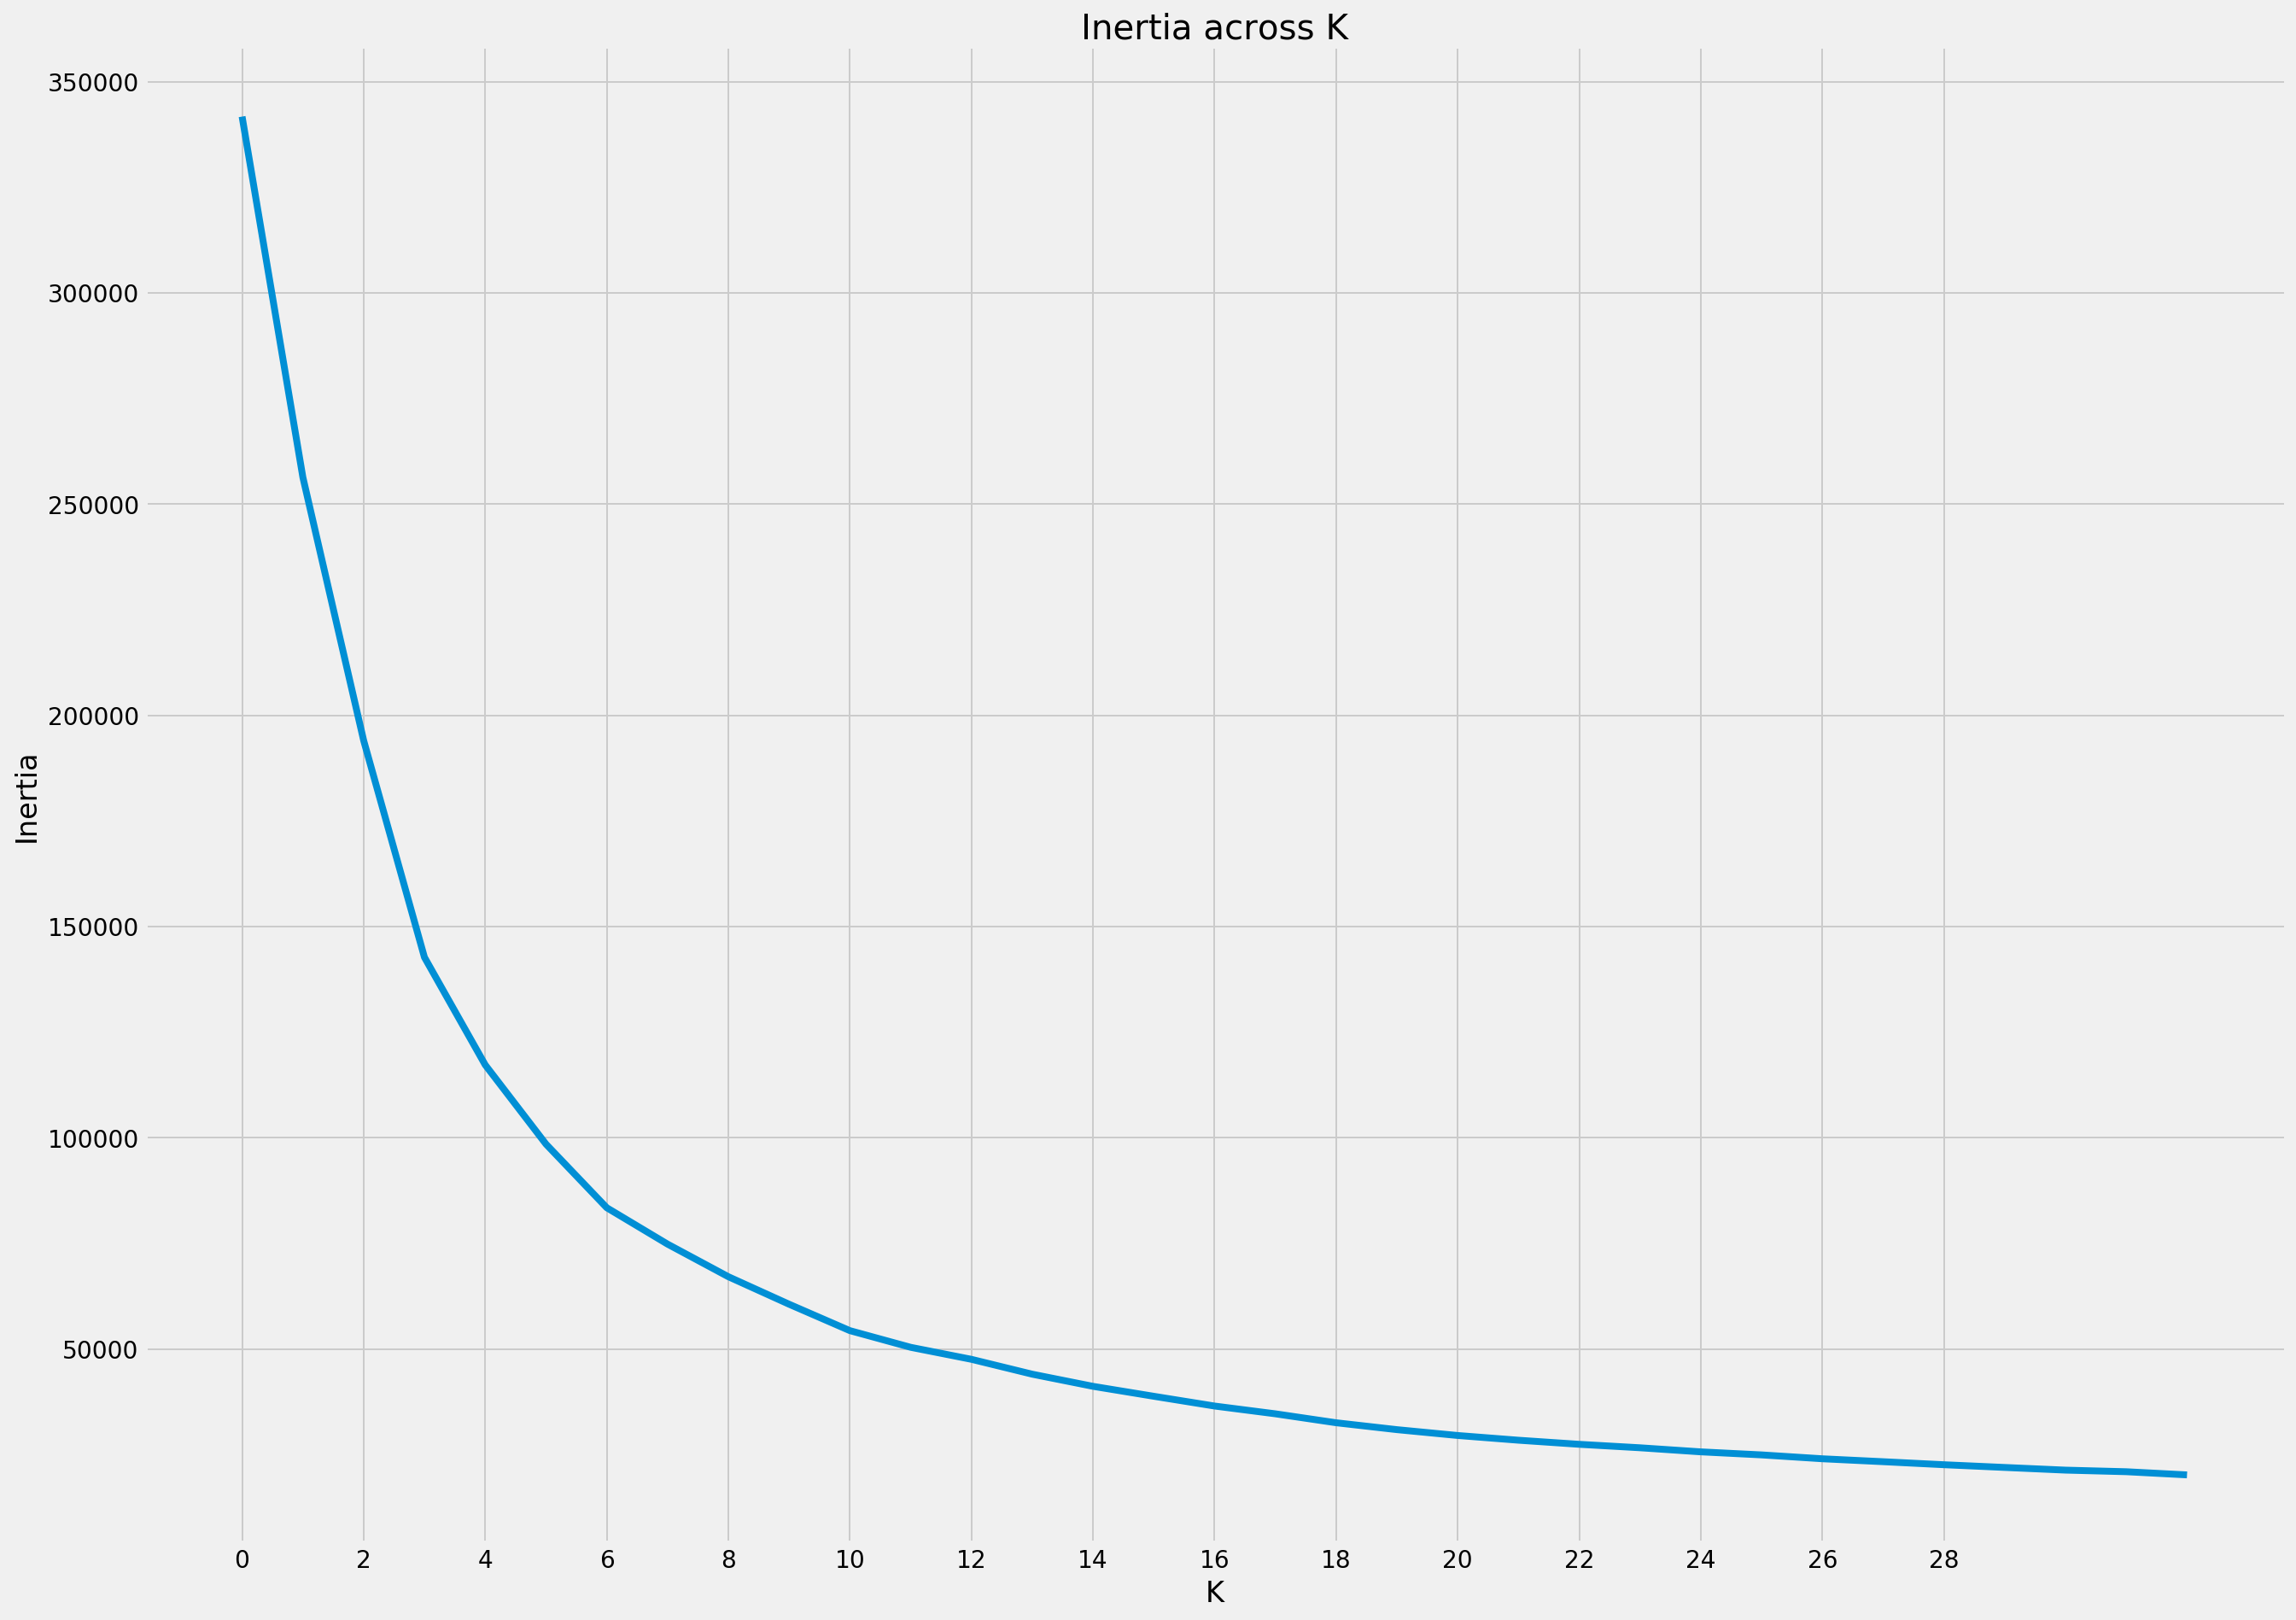

In [133]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(20, 15))

plt.plot(inertias)
plt.xticks(np.arange(0, 30, 2)) 
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K")
sns.despine()

In [55]:
labels_25 = K_Meangrouping.labels_
print(labels_25)
clusters_ = K_Meangrouping.cluster_centers_
clusters_

[ 7  7  0 ... 11  1  8]


array([[-4.71510919e-01, -3.34440962e-01,  2.48060382e+04,
        -4.62869948e-01, -1.36119083e-02, -4.19056627e-01,
        -3.89746654e-01, -6.33620657e-03, -1.55093839e-01,
         2.63995535e-02, -1.10335540e-01,  5.85647789e-02,
         8.66777504e-02],
       [ 1.66994497e+00,  1.11728898e+00,  2.38464522e+05,
         1.49674318e+00,  9.74130183e-03,  1.48144133e+00,
         1.31462065e+00,  4.29634890e-02,  3.43428385e-01,
        -1.11526345e-01, -7.28581439e-02, -3.11516305e-01,
         2.14518380e-01],
       [ 1.44747688e+01,  1.12676131e+00,  1.44356890e+06,
         1.15387117e+01, -1.57076671e-02,  6.88372375e+00,
         4.65158180e+00, -7.67234829e-01,  5.19465295e+00,
         3.16205760e-01, -2.92236591e-01,  5.15486861e-01,
        -2.81432637e-01],
       [ 1.69504457e-01,  4.04279180e-01,  9.00404523e+04,
         4.00485822e-02, -3.67387072e-02, -2.64839223e-02,
        -5.49237615e-02, -3.45684137e-01, -4.27757095e-02,
        -1.12590622e-01,  2.87167563e

In [56]:
silhouette_score(x, labels_25)

0.5636767876142367

NameError: name 'true' is not defined

KeyboardInterrupt: 

In [44]:
K_Means_4 = KMeans(n_clusters= 4)
K_Means_4.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
comparablerentals.shape

(86910, 22)

In [6]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


geolocator = Nominatim(user_agent="my-app", timeout=1000)
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)


Feature Selection

In [111]:
mutual_reg = SelectKBest(mutual_info_regression, k=6)

mutual_reg.fit(x, y_train.ravel())


SelectKBest(k=6, score_func=<function mutual_info_regression at 0x1c2a5f4400>)

In [112]:
f_reg = SelectKBest(f_regression, k=6)
f_reg.fit(x, y_train.ravel())

SelectKBest(k=6, score_func=<function f_regression at 0x1c2a5c42f0>)

In [113]:
kbest = pd.DataFrame([x.columns, mutual_reg.scores_, f_reg.scores_], 
                     index=['feature', 'mutual_reg', 'f_reg']).T.sort_values('mutual_reg', ascending=False)
kbest

,feature,mutual_reg,f_reg
8,Market Value per SqFt,1.82323,265386
3,Estimated Gross Income,1.51856,10236.4
5,Expense per SqFt,1.35319,1025.65
7,Full Market Value,1.27802,12011.7
6,Net Operating Income,1.22643,13949.4
2,Gross SqFt,1.14771,23.2706
4,Estimated Expense,1.11328,4630.96
0,Total Units,0.690605,34.2405
1,Year Built,0.565791,1658
13,Borough PCA 3,0.479181,2528.92


In [115]:
post_feat_selection_x = comparablerentals[['Market Value per SqFt', 'Estimated Gross Income', 'Expense per SqFt', 'Full Market Value', 'Net Operating Income', 'Gross SqFt']]

In [121]:
post_feat_selection_x = post_feat_selection_x.fillna(0)

In [124]:
inertias = []
for n_clusters in range(2,35, 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(post_feat_selection_x)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

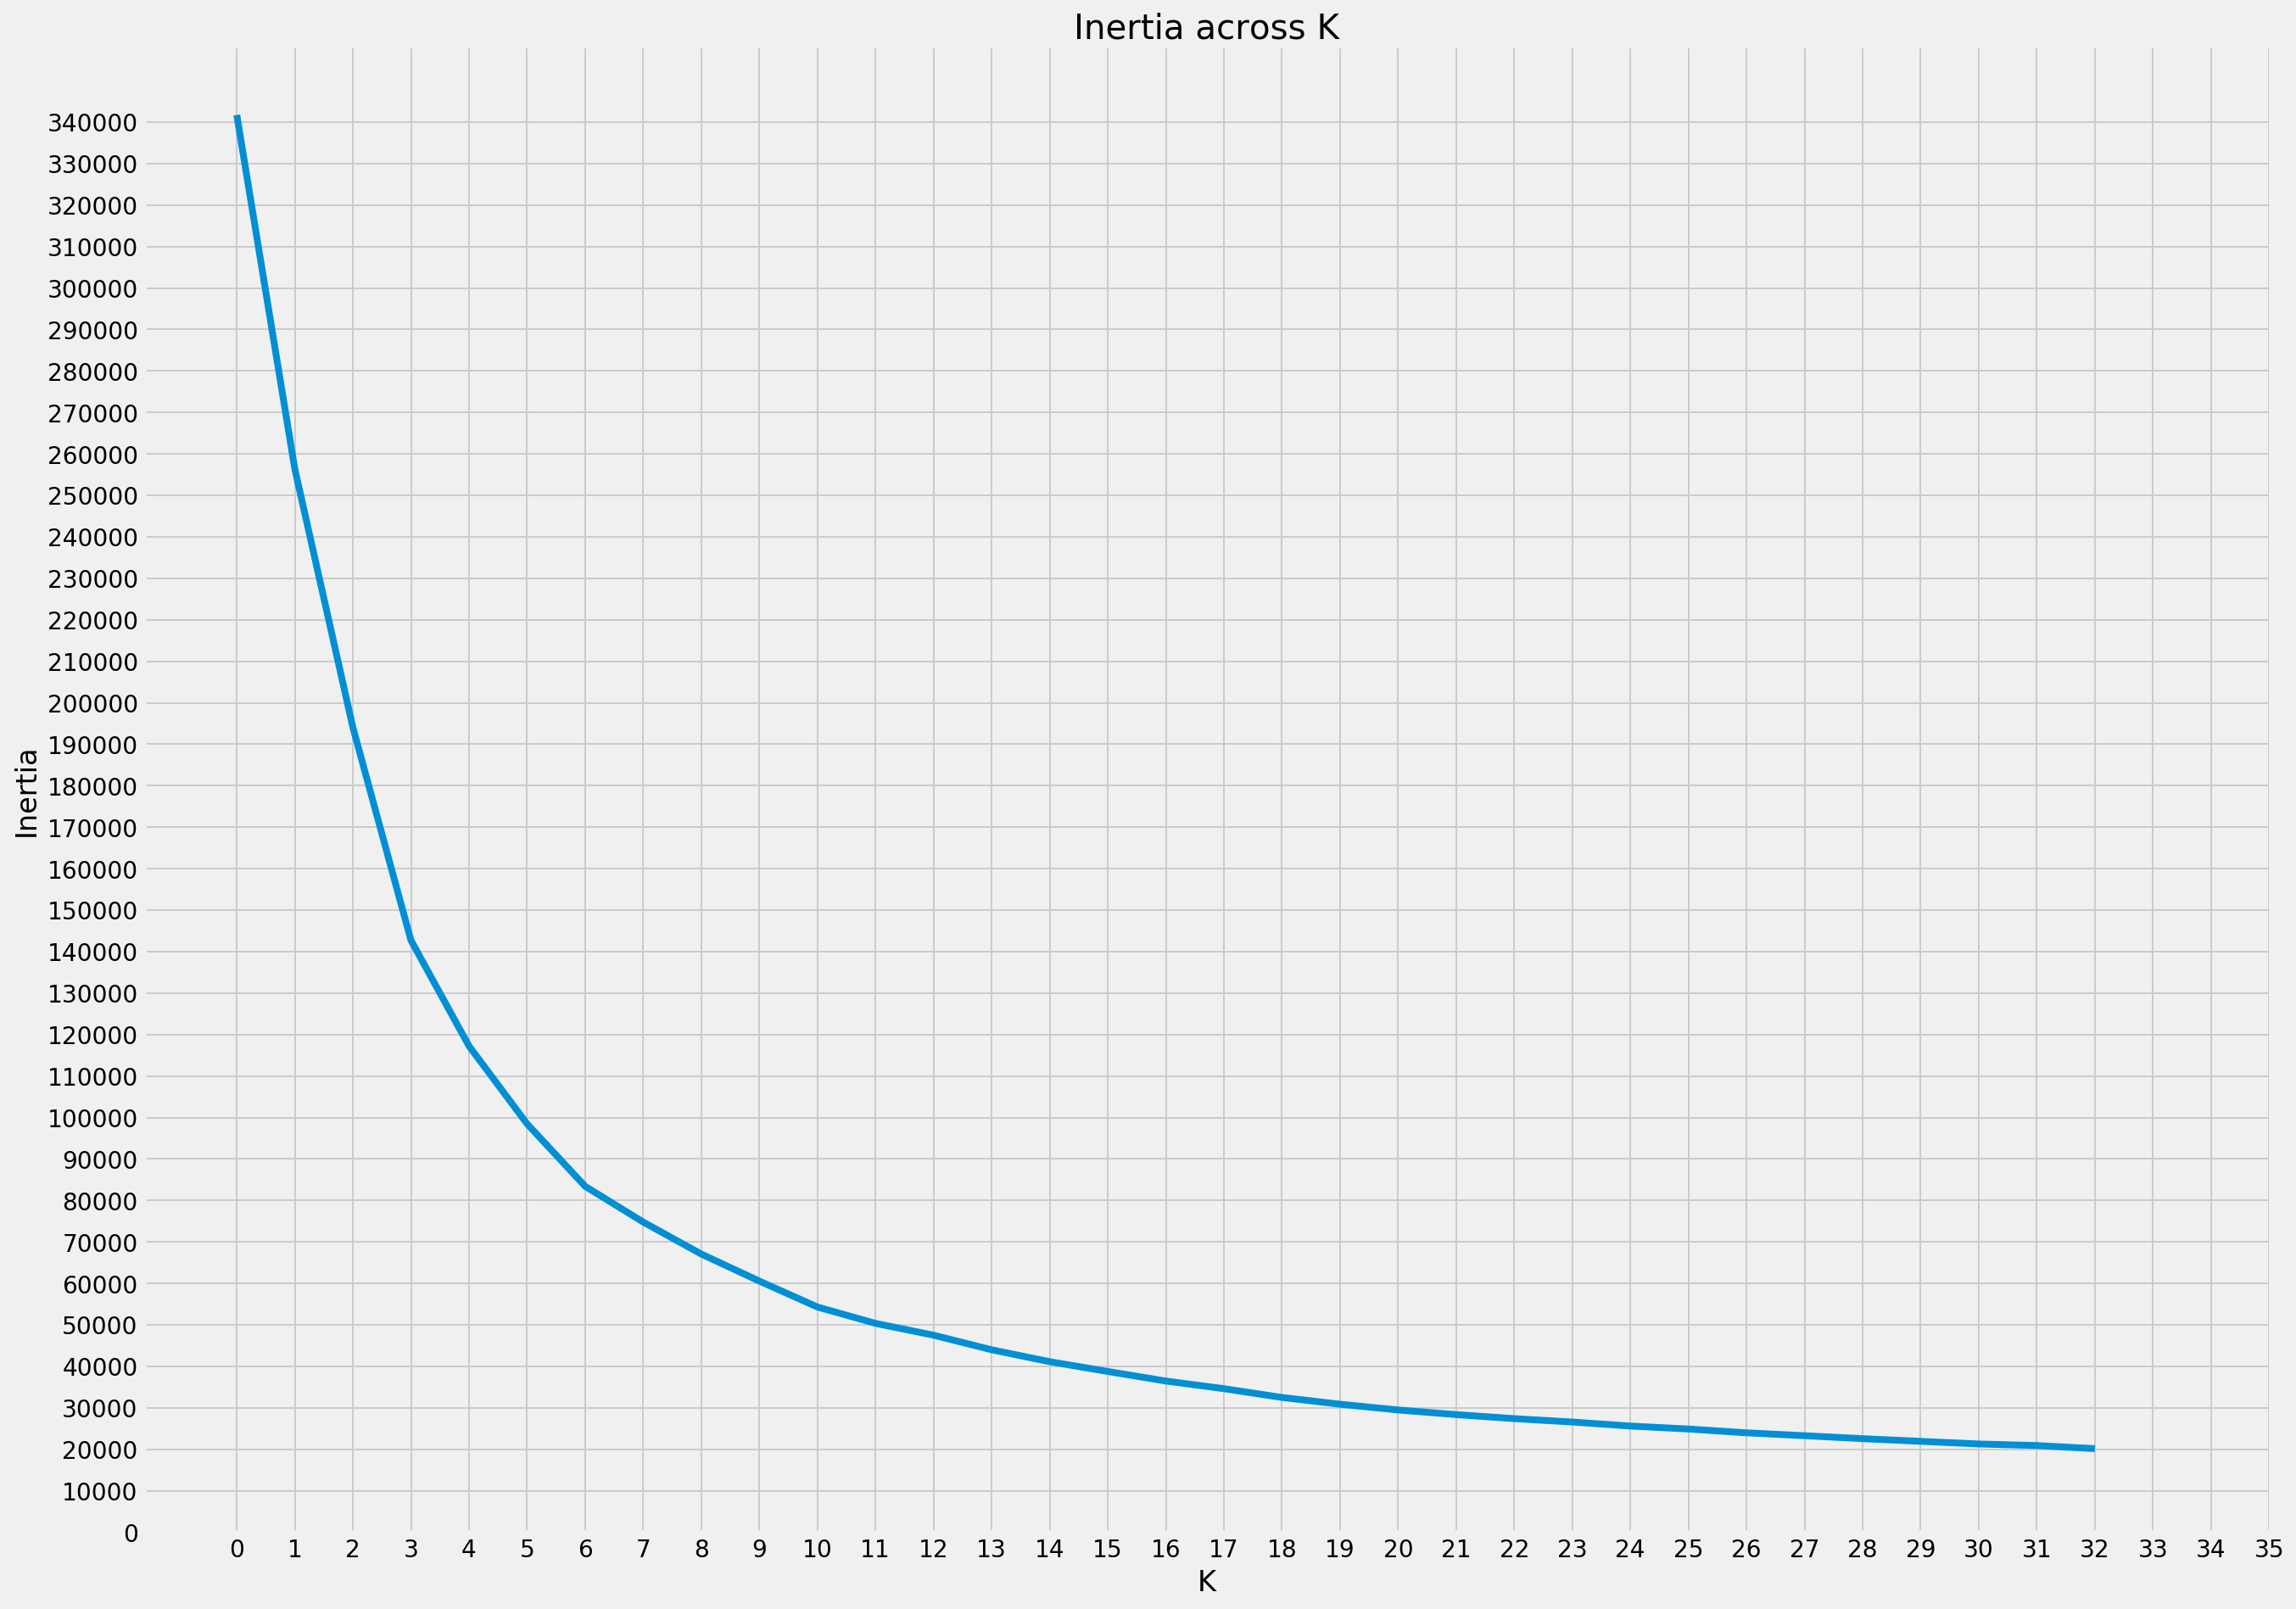

In [132]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(20, 15))


plt.plot(inertias)
plt.xticks(np.arange(0, 36, 1)) 
plt.yticks(np.arange(0, 350000, 10000))
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K")
sns.despine()

plt.style.use('fivethirtyeight')



In [134]:
K_Meangrouping = KMeans(n_clusters= 27)
K_Meangrouping.fit(post_feat_selection_x)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=27, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
labels_27 = K_Meangrouping.labels_
print(labels_27)
clusters_ = K_Meangrouping.cluster_centers_
clusters_

[ 2  2 22 ... 17 20 12]


array([[-7.95882102e-01, -2.87916195e-01, -9.32967761e-02,
        -3.37946311e-01, -3.24069624e-01, -3.08919551e-02],
       [ 1.00709307e+00,  3.74621366e+00,  1.54745933e-01,
         3.53849612e+00,  3.85363525e+00,  2.53043786e+00],
       [ 2.58007129e-01,  4.30953916e-02,  5.58019335e-02,
         9.35938721e-03,  7.17353444e-02, -9.41546337e-02],
       [-8.71767548e-01, -3.12966200e-01,  2.92296241e+02,
        -4.34859730e-01, -3.13918017e-01, -2.76387728e-01],
       [ 2.00909990e+00,  1.23818473e+00,  1.67873736e-01,
         1.78335393e+00,  1.33455618e+00,  5.58248681e-01],
       [ 2.79498066e-01,  2.15796545e+01,  1.32715038e-01,
         1.79700884e+01,  1.93396126e+01,  2.02557327e+01],
       [-9.09695561e-01, -5.29437266e-01, -9.12338598e-02,
        -5.08754518e-01, -5.25730587e-01, -4.98285772e-01],
       [ 5.69781526e-01,  1.36147026e+00,  9.99377483e-02,
         1.15373232e+00,  1.43493591e+00,  9.18311857e-01],
       [ 2.39726871e-01,  7.26868132e+01,  2.453

In [136]:
silhouette_score(post_feat_selection_x, labels_27)

0.33828430212178223

In [155]:
y_train = np.asarray(y_train)

In [165]:
y_train = y_train.reshape(-1, 1)

In [167]:
list(y_train)

[array([34.64]),
 array([35.77]),
 array([24.8]),
 array([27.51]),
 array([26.85]),
 array([32.22]),
 array([32.24]),
 array([31.29]),
 array([33.3]),
 array([32.24]),
 array([33.3]),
 array([40.91]),
 array([20.97]),
 array([16.37]),
 array([34.64]),
 array([24.8]),
 array([41.94]),
 array([42.59]),
 array([46.29]),
 array([36.46]),
 array([32.17]),
 array([36.11]),
 array([32.6]),
 array([34.22]),
 array([46.29]),
 array([39.7]),
 array([35.77]),
 array([35.77]),
 array([23.37]),
 array([34.64]),
 array([28.82]),
 array([32.17]),
 array([21.86]),
 array([34.47]),
 array([24.8]),
 array([32.35]),
 array([33.51]),
 array([33.2]),
 array([28.2]),
 array([41.94]),
 array([42.59]),
 array([28.31]),
 array([32.35]),
 array([15.14]),
 array([31.95]),
 array([35.41]),
 array([28.82]),
 array([42.07]),
 array([46.83]),
 array([46.72]),
 array([34.7]),
 array([15.14]),
 array([24.8]),
 array([29.8]),
 array([15.14]),
 array([29.8]),
 array([32.35]),
 array([26.23]),
 array([35.1]),
 array([34.

In [229]:
from sklearn.metrics import completeness_score
completeness_score(y_train, labels_27)
from sklearn.metrics import homogeneity_score
homogeneity_score(y_train, labels_27)

ValueError: labels_true must be 1D: shape is (86910, 1)

In [168]:
lm.fit(post_feat_selection_x,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
lm.score(post_feat_selection_x, y_train)

0.8452703085861808

In [171]:
post_feat_selection_x_test = condos[['Market Value per SqFt', 'Estimated Gross Income', 'Expense per SqFt', 'Full Market Value', 'Net Operating Income', 'Gross SqFt']]

In [172]:
y_hat = lm.predict(post_feat_selection_x_test)

In [180]:
residuals = y_hat - y_test

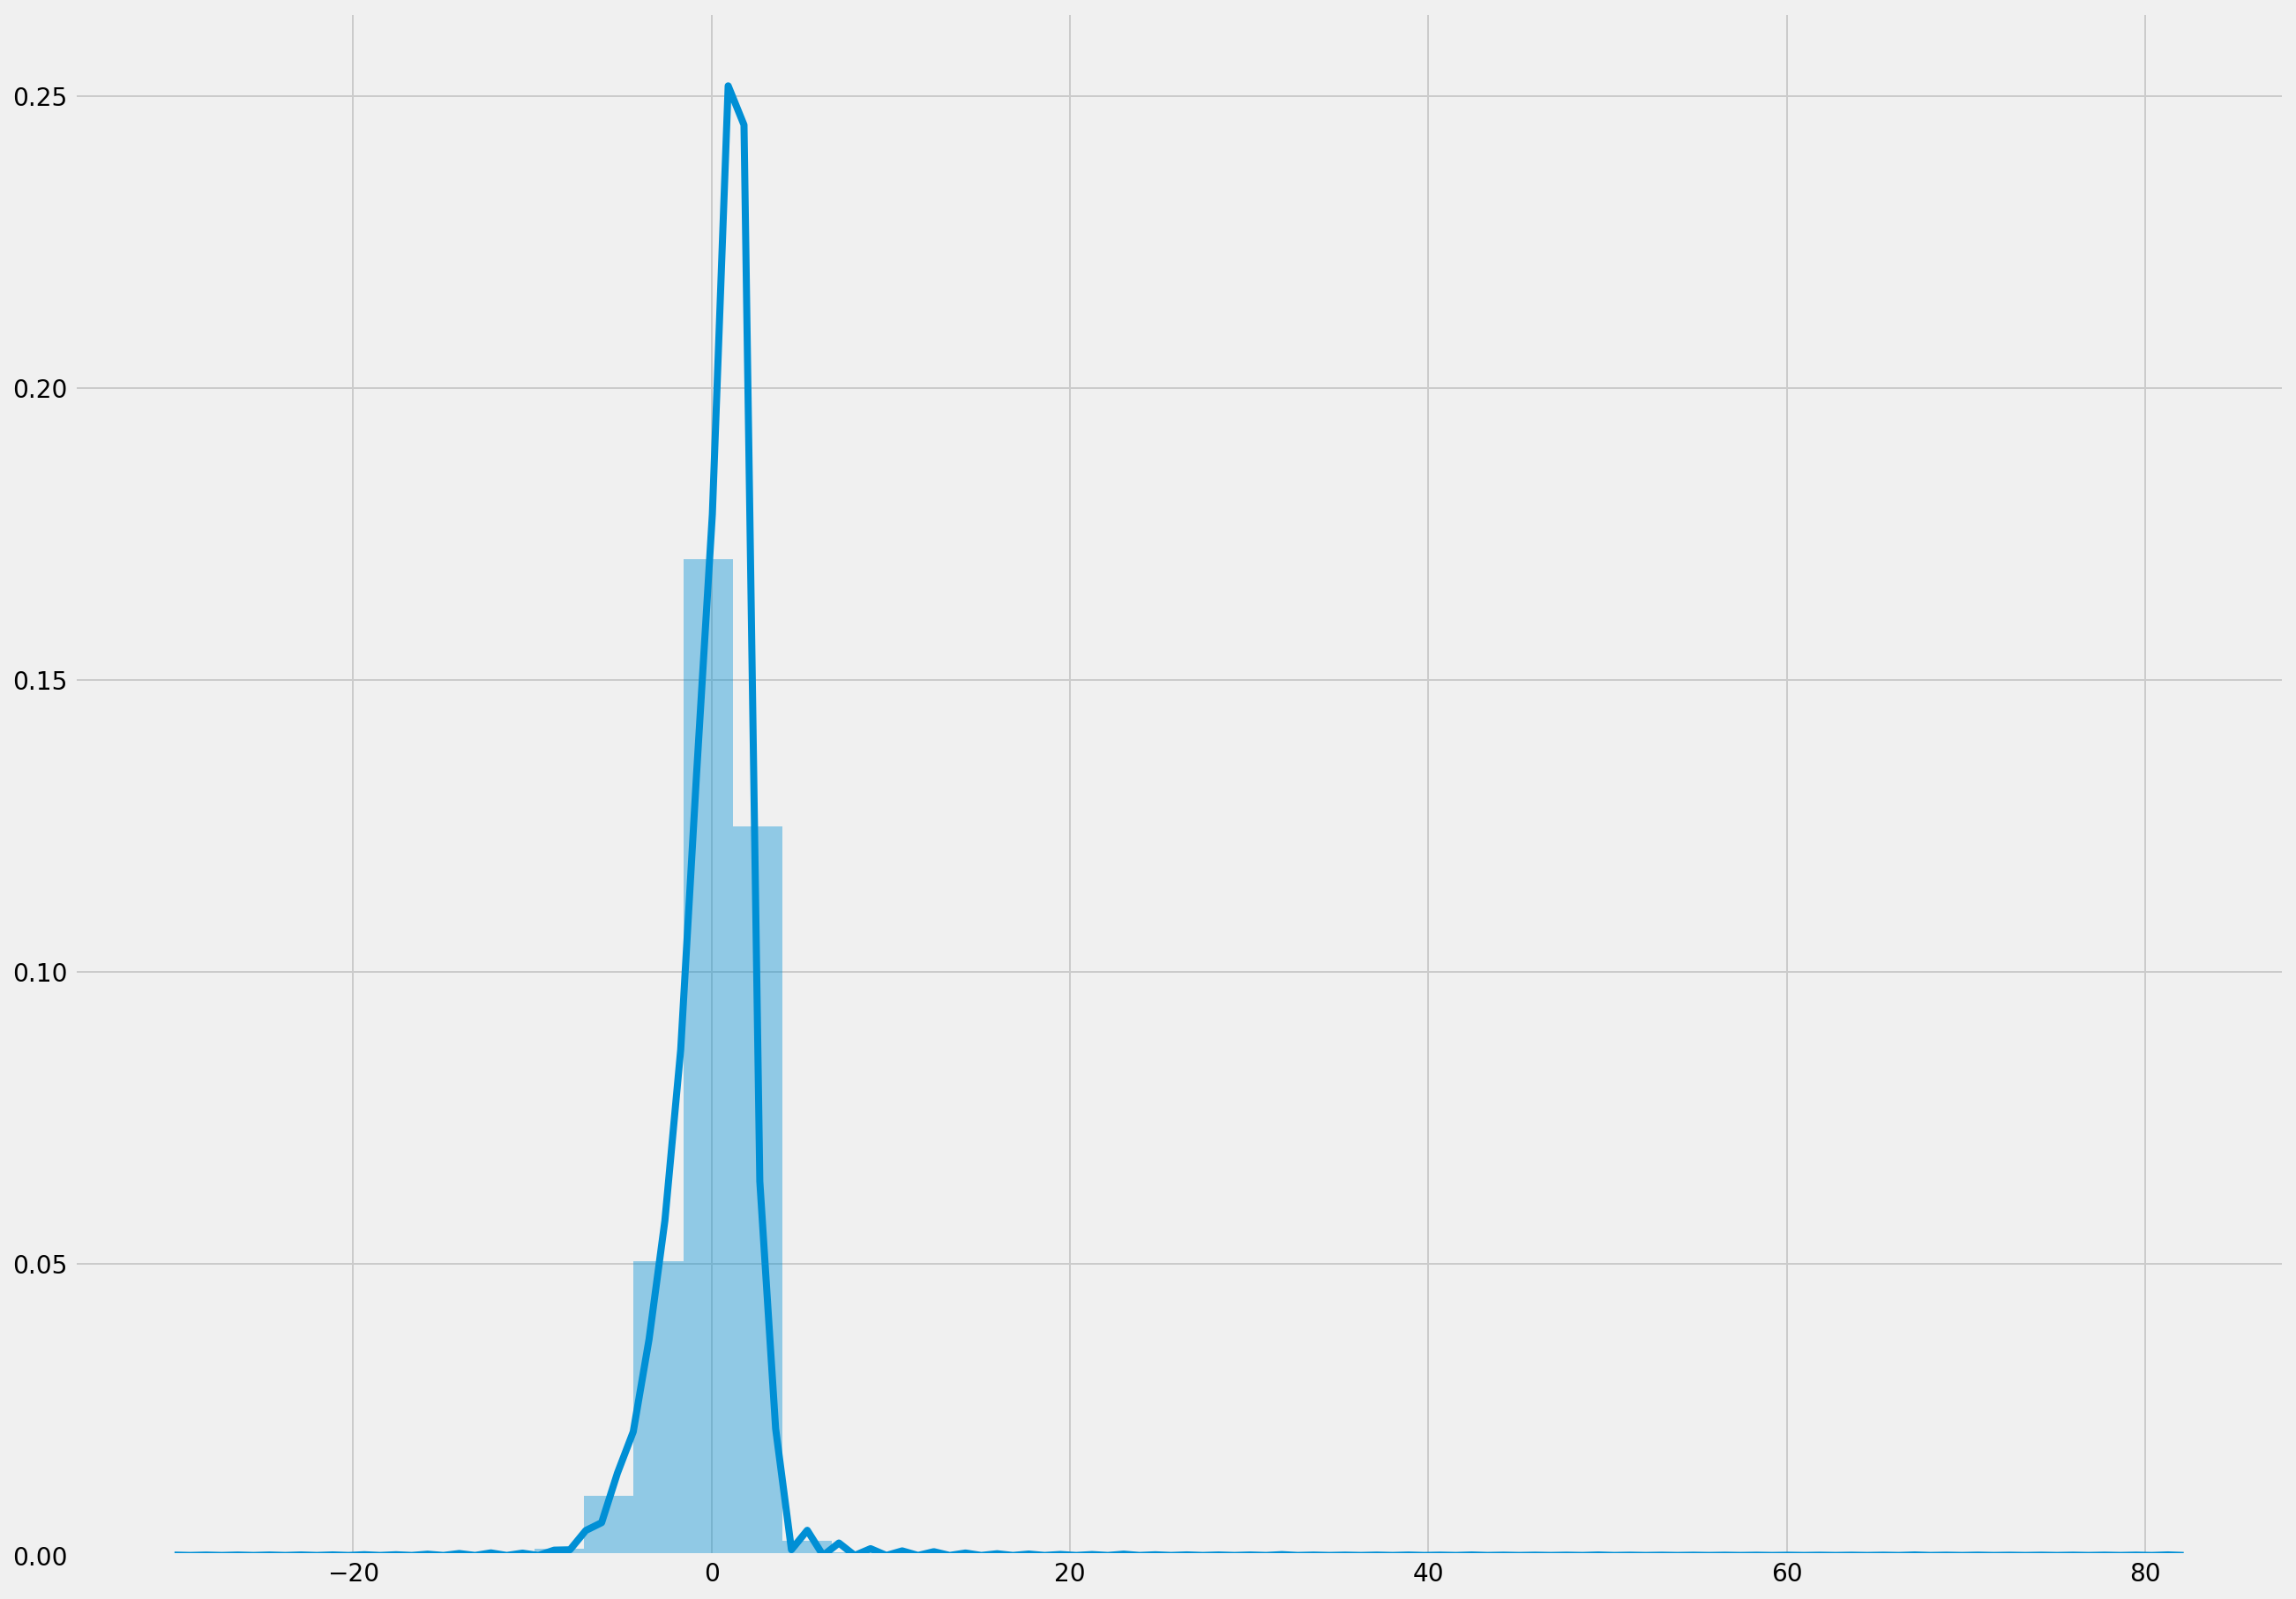

In [184]:
plt.figure(figsize=(20, 15))
sns.distplot(residuals,bins=40)

In [202]:
sns.lmplot(x=condos['Market Value per SqFt'], y=residuals, data=comparablerentals)

TypeError: '<' not supported between instances of 'list' and 'float'

In [217]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [206]:
rmse_val = [] #to store rmse values for different k
for K in range(35):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(post_feat_selection_x, y_train)  #fit the model
    pred=model.predict(post_feat_selection_x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 11.22304330221437
RMSE value for k=  2 is: 10.252210135861795
RMSE value for k=  3 is: 9.476015050593018
RMSE value for k=  4 is: 9.023081224104105
RMSE value for k=  5 is: 8.685155603585452
RMSE value for k=  6 is: 8.453328843133699
RMSE value for k=  7 is: 8.255815212426803
RMSE value for k=  8 is: 8.05325810441785
RMSE value for k=  9 is: 7.881735602971206
RMSE value for k=  10 is: 7.741876800768081
RMSE value for k=  11 is: 7.624757578193724
RMSE value for k=  12 is: 7.516640371261779
RMSE value for k=  13 is: 7.415620408280904
RMSE value for k=  14 is: 7.328215920801184
RMSE value for k=  15 is: 7.244903215229745
RMSE value for k=  16 is: 7.173375009500692
RMSE value for k=  17 is: 7.102882394894787
RMSE value for k=  18 is: 7.037651948979278
RMSE value for k=  19 is: 6.976403384390867
RMSE value for k=  20 is: 6.920911692420023
RMSE value for k=  21 is: 6.868055161777608
RMSE value for k=  22 is: 6.81585304629406
RMSE value for k=  23 is: 6.76905963989451

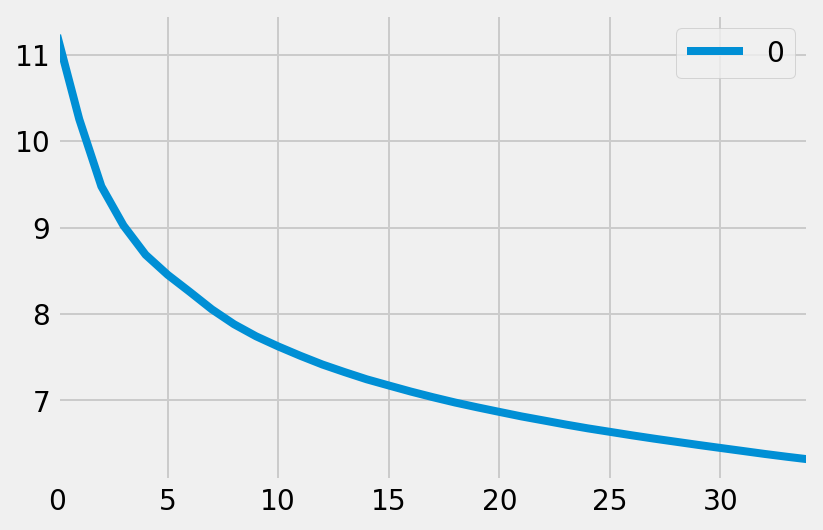

In [207]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [224]:
knn3 = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='kd_tree')

In [225]:
knn3.fit(post_feat_selection_x, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [226]:
from sklearn.neighbors import NearestNeighbors

In [236]:
knn3neighbors = knn3.kneighbors(post_feat_selection_x_test, return_distance=True)

In [231]:
y_train.shape

(86910, 1)

In [235]:
y_train.mean()

25.94967897825336

In [262]:
for col in knn3neighbors: 
    

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

ValueError: color kwarg must have one color per data set. 3 data sets and 1 colors were provided

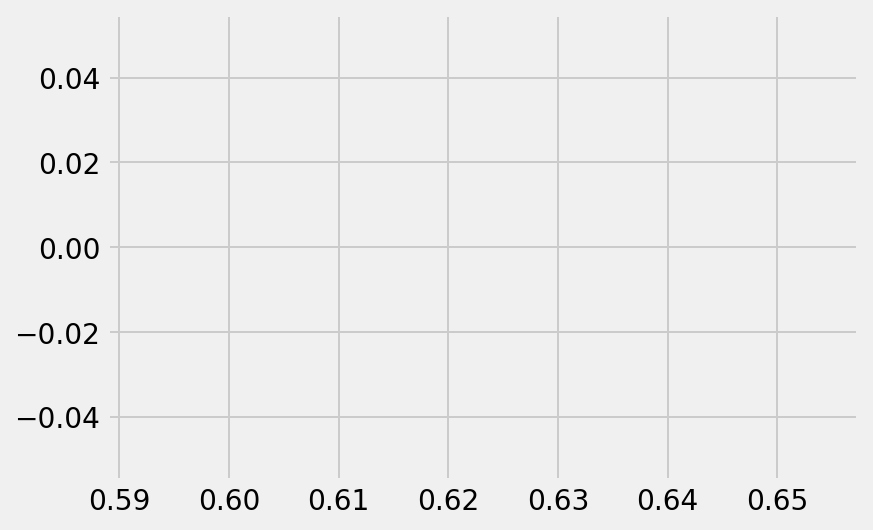

In [264]:
sns.distplot(knn3neighbors[0])

In [258]:
print(knn3neighbors[1])

[[60088 21047 20266]
 [16584 23626 21400]
 [13496  9463  8562]
 ...
 [ 4331  5404  4341]
 [ 9183  5404  4341]
 [ 5657  5108  5231]]
